In [2]:
!git  clone https://github.com/vik235/CodeMixed-Hinglish 

Cloning into 'CodeMixed-Hinglish'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 716 (delta 37), reused 125 (delta 23), pack-reused 573
Receiving objects: 100% (716/716), 71.39 MiB | 25.34 MiB/s, done.
Resolving deltas: 100% (213/213), done.
Checking out files: 100% (691/691), done.


Cleansing.ipynb			   Model_dev_Hot.py
data				   modelperf
DataSplit.ipynb			   models
englishmodel.ipynb		   New\ Text\ Document.txt
FinalModels			   Preprocessing.ipynb
HinglishWordRepresentations.ipynb  Preprocessing.py
hot.ipynb			   README.md
hot.py				   src_data_massage.ipynb
indic_nlp_examples.ipynb	   src_preprocess_messages.ipynb
logs				   training.py
Model_dev_Hot.ipynb		   Transliteration


In [6]:
%cd CodeMixed-Hinglish/
!dir

[Errno 2] No such file or directory: 'CodeMixed-Hinglish/'
/content/CodeMixed-Hinglish
Cleansing.ipynb			   Model_dev_Hot.py
data				   modelperf
DataSplit.ipynb			   models
englishmodel.ipynb		   New\ Text\ Document.txt
FinalModels			   Preprocessing.ipynb
HinglishWordRepresentations.ipynb  Preprocessing.py
hot.ipynb			   README.md
hot.py				   src_data_massage.ipynb
indic_nlp_examples.ipynb	   src_preprocess_messages.ipynb
logs				   training.py
Model_dev_Hot.ipynb		   Transliteration


In [4]:
!pip install keras_metrics

In [7]:
import os
import keras
import io
import csv
import time
import datetime

from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
import numpy as np
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.layers import Dropout, SimpleRNN, LSTM, Bidirectional
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import keras_metrics
from keras.utils.vis_utils import plot_model
from keras.models import load_model
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
import keras.backend as K

## Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
import time


Using TensorFlow backend.


In [8]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-12-01 11:57:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-12-01 11:57:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-12-01 11:57:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [9]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [10]:
!ls


 Cleansing.ipynb		     logs
 data				     Model_dev_Hot.ipynb
 DataSplit.ipynb		     Model_dev_Hot.py
 englishmodel.ipynb		     modelperf
 FinalModels			     models
 glove.6B.100d.txt		    'New Text Document.txt'
 glove.6B.200d.txt		     Preprocessing.ipynb
 glove.6B.300d.txt		     Preprocessing.py
 glove.6B.50d.txt		     README.md
 glove.6B.zip			     src_data_massage.ipynb
 HinglishWordRepresentations.ipynb   src_preprocess_messages.ipynb
 hot.ipynb			     training.py
 hot.py				     Transliteration
 indic_nlp_examples.ipynb


In [0]:
##Set params for the model
tensorBoard_logs_dir = 'logs'
model_dir = 'models'
glove_dir = '.\\models\\glove'
train_dir = "data/train/"
train_data = 'messages_3.csv'
label_data = 'labels_3.csv'

maxlen = 200
training_samples = 2800
validation_samples = 500# len(labels) - training_samples #
max_words = 10000
num_filters = 64 
embedding_dim = 200
num_filters = 64 
num_classes = 3



In [0]:
texts = []
labels = []
train_dir = "data/train/"

with open(os.path.join(train_dir, train_data), newline ='') as messageData:
    reader = csv.reader(messageData)
    for row in reader:
        message = (''.join(row))
        texts.append(message)

with open(os.path.join(train_dir, label_data)) as labelData:
    reader = csv.reader(labelData)
    for row in reader:
        #label = (''.join(row))
        labels.append(row)

labels = np.squeeze(labels)#[(np.squeeze(i)) for i in labels]
#np.squeeze(labels[:])
#la


In [13]:
'''
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels,)
labells = np_utils.to_categorical(encoded_Y)
print(labells[0,])

'''
labells = np_utils.to_categorical(labels, num_classes=num_classes)
labells[0:20,]
np.sum(labells, axis = 0)

array([1121., 1818., 1765.], dtype=float32)

In [14]:
##Tokenizer, Sequencer and padding via Keras
np.random.seed(1) 

#tokenize the data for the maxwords
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

#Generate the sequences on texts on the the data by tokenizer
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.'% len(word_index))
#print(word_index)
#Padding sequences (making them all equal)
data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of the data tensor:' , data.shape)
print('Shape of the label tensor:' , labells.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labells[indices,:]

x_train = data#[:training_samples]
y_train = labels#[:training_samples]
print(indices[0:10])
#x_test = data[training_samples:training_samples + validation_samples]
#y_test = labels[training_samples:training_samples + validation_samples]

print("Train length" , len(x_train))
#print("Test length" , len(x_test))


Found 7281 unique tokens.
Shape of the data tensor: (4704, 200)
Shape of the label tensor: (4704, 3)
[3727 3729 4021 2968 4496 4258 2637 1766 3494 2416]
Train length 4704


In [15]:
np.random.seed(1) 
embedding_index = {}
f = open(os.path.join('glove.6B.200d.txt'), encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
   # print(word)
    coefs = np.asarray(values[1:], dtype = 'float32')
    embedding_index[word] = coefs
f.close()


print('Found %s word vectors' % len(embedding_index))

Found 400000 word vectors


In [16]:
np.random.seed(1) 
embedding_matrix = np.zeros((max_words, embedding_dim))
count = 0 
ignored_words = []
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        else:
            ignored_words.append(word)  
            count = count + 1
print(embedding_matrix.shape)       


(10000, 200)


In [0]:
def save_model(model_qualifier, model, location):
    model_name = model_qualifier + "-{}".format(datetime.date.today()) + "-{}".format(time.time())
    try:
        model.save(os.path.join(location, model_name))
        #plot_model(model, to_file=os.path.join(location, model_name)+ '.png')
    except:
        print("Exception occured while saving the model to disc.")

In [18]:

K.clear_session()

In [19]:
np.random.seed(1) 

model = Sequential() 
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
'''
model.add(LSTM(32, recurrent_dropout = 0.2, return_sequences=True))
model.add(LSTM(32, recurrent_dropout = 0.2, return_sequences=True))
model.add(LSTM(32, recurrent_dropout = 0.2, return_sequences=True))
model.add(LSTM(32))

model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(Dropout(0.6))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(Dropout(0.7))
model.add(MaxPooling1D(2))
model.add(Conv1D(num_filters, 7, activation='relu', padding='same'))
model.add(Dropout(0.6))
model.add(GlobalMaxPooling1D())
'''
model.add(Bidirectional(LSTM(32, recurrent_dropout = 0.4, return_sequences=True)))
model.add(Bidirectional(LSTM(32, recurrent_dropout = 0.4, return_sequences=True)))
model.add(Bidirectional(LSTM(32, recurrent_dropout = 0.4, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
#model.add(Dropout(0.5))
#model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(3, activation = 'softmax'))
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model_name = "CodeMixed-Emb-BiLSTM_32x2_64x1_DO-Dense_64x2-{}".format(int(time.time()))
model.summary()

'''
model = load_model('.\\models\Best_English-Emb-TFL-CNN_64x7x3_DO-Dense_64x2_model.h5')
model_name = "CodeMixed-Emb-UnTrained-CNN_64x7x3_DO-Dense_64x1-{}".format(int(time.time()))

model.trainable = True
set_trainable = False
for layer in model.layers:
   # print(layer.name, ': ', layer.trainable)
    if layer.name in ['dense_27','dense_28', 'dense_29']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

for layer in model.layers:        
    print(layer.name, ': ', layer.trainable)

layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

'''




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 200)          2000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 64)           59648     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200, 64)           24832     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200, 64)           24832     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160    

'\nmodel = load_model(\'.\\models\\Best_English-Emb-TFL-CNN_64x7x3_DO-Dense_64x2_model.h5\')\nmodel_name = "CodeMixed-Emb-UnTrained-CNN_64x7x3_DO-Dense_64x1-{}".format(int(time.time()))\n\nmodel.trainable = True\nset_trainable = False\nfor layer in model.layers:\n   # print(layer.name, \': \', layer.trainable)\n    if layer.name in [\'dense_27\',\'dense_28\', \'dense_29\']:\n        set_trainable = True\n    if set_trainable:\n        layer.trainable = True\n    else:\n        layer.trainable = False\n\nmodel.layers[0].set_weights([embedding_matrix])\nmodel.layers[0].trainable = False\n\nfor layer in model.layers:        \n    print(layer.name, \': \', layer.trainable)\n\nlayers = [(layer, layer.name, layer.trainable) for layer in model.layers]\npd.DataFrame(layers, columns=[\'Layer Type\', \'Layer Name\', \'Layer Trainable\'])   \n\n'

In [20]:
optimizer = Adam(lr=0.005, decay=1e-6)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics=['acc'])


In [0]:
#callbacks 
earlystopping = EarlyStopping(monitor='val_acc', mode='min', verbose=1, patience=100, restore_best_weights= True)

modelcheckpoint = ModelCheckpoint('models/Colab_Best_Hinglish-Emb-BiLSTM_32x2_64x1_DO-Dense_64x2_model.h5', monitor='val_acc', mode='min', verbose=1)

reduce_lr_plateau = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
tensorboard = TensorBoard(log_dir = tensorBoard_logs_dir + '{}'.format(model_name), 
                         histogram_freq=1,
                         #embeddings_freq=1
                         )

In [0]:
history = model.fit(x_train, y_train, epochs = 500, batch_size = 1024,validation_split=0.1, callbacks = [tensorboard, earlystopping, reduce_lr_plateau, modelcheckpoint])
#results = model.evaluate(x_test, y_test)
#model.save_weights(model_dir + '{}'.format(model_name)+'.h5')
save_model("Colab_Best_Hinglish-Emb-BiLSTM_32x2_64x1_DO-Dense_64x2_model", model, "models")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 4233 samples, validate on 471 samples



Epoch 1/500
4233/4233 [==============================] - 25s 6ms/step - loss: 1.3617 - acc: 0.4193 - val_loss: 1.6554 - val_acc: 0.4883


Epoch 00001: saving model to models/Colab_Best_Hinglish-Emb-BiLSTM_32x2_64x1_DO-Dense_64x2_model.h5
Epoch 2/500
4233/4233 [==============================] - 18s 4ms/step - loss: 0.8777 - acc: 0.6312 - val_loss: 1.1610 - val_acc: 0.6921

Epoch 00002: saving model to models/Colab_Best_Hinglish-Emb-BiLSTM_32x2_64x1_DO-Dense_64x2_model.h5
Epoch 3/500
4233/4233 [==============================] - 18s 4ms/step - loss: 0.6660 - acc: 0.7307 - val_loss: 0.7768 - val_acc: 0.7792

Epoch 00003: saving model to models/Colab_Best_Hinglish-Emb-BiLSTM_32x2_64x1_DO-Dense_64x2_model.h5
Epoch 4/500
4233/4233 [==============================] - 18s 4ms/step - loss: 0.5244 - acc: 0.7964 - val_loss: 0.7398 - val_acc: 0.8259

Epoch

In [0]:
!dir

Cleansing.ipynb			   logs
data				   Model_dev_Hot.ipynb
DataSplit.ipynb			   Model_dev_Hot.py
englishmodel.ipynb		   modelperf
FinalModels			   models
glove.6B.100d.txt		   New\ Text\ Document.txt
glove.6B.200d.txt		   Preprocessing.ipynb
glove.6B.300d.txt		   Preprocessing.py
glove.6B.50d.txt		   README.md
glove.6B.zip			   src_data_massage.ipynb
HinglishWordRepresentations.ipynb  src_preprocess_messages.ipynb
hot.ipynb			   training.py
hot.py				   Transliteration
indic_nlp_examples.ipynb


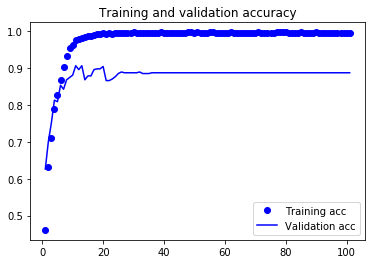

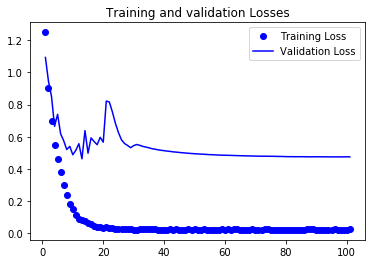

<Figure size 432x288 with 0 Axes>

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label ='Training acc')
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label ='Training Loss')
plt.plot(epochs, val_loss, 'b', label ='Validation Loss')
plt.title("Training and validation Losses")
plt.legend()
plt.figure()

plt.show()

In [0]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-11-30 14:09:57--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.229.196.117, 52.71.210.177, 52.3.157.51, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.229.196.117|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  18.1MB/s    in 0.7s    

2019-11-30 14:09:58 (18.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
%cd logs

/content/CodeMixed-Hinglish/logs


In [0]:
!dir

CodeMixed-HOT-Emb-TFF-CONV-64x1x3-MP-Dense-64x1-BN-DO-1573388387
CodeMixed-HOT-Emb-TFF-CONV-64x2x3-MP-Dense-64x1-BN-DO-1573388542
CodeMixed-HOT-Emb-TFF-CONV-64x2x7-MP-Dense-64x1-BN-DO-1573388670
CodeMixed-HOT-Emb-TFF-CONV-64x3x7-MP-Dense-64x1-BN-DO-1573388824
CodeMixed-HOT-Emb-TFF-CONV-64x3x7-MP-Dense-64x1-BN-DO-1574001521
CodeMixed-HOT-Emb-TFF-CONV-64x3x7-MP-Dense-64x2-BN-DO-1573389431
CodeMixed-HOT-Emb-TFF-CONV-64x3x7-MP-Dense-64x2-BN-DO-1573997675
CodeMixed-HOT-Emb-TFF-CONV-64x3x7-MP-Dense-64x2-BN-DO-1574001926
CodeMixed-HOT-Emb-TFF-CONV-TransCNN-Model-1573389142
CodeMixed-HOT-Emb-TFF-Fl-Dense-64x1-BN-DO-1573388013
CodeMixed-HOT-Emb-TFT-CONV-64x3x7-MP-Dense-64x1-BN-DO-1574001702
CodeMixed-HOT-Emb-TFT-CONV-64x3x7-MP-Dense-64x2-BN-DO-1574001858
CodeMixed-HOT-Emb-TFT-Fl-Dense-64x1-BN-DO-1573388101
CodeMixed-HOT-TRANSCNN-BASE-1573389345
metadata.tsv
